In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
train_dir = r"E:\HOPE\AI CLASS\DEEP LEARNING\car classification\car_data_split\train"
val_dir = r"E:\HOPE\AI CLASS\DEEP LEARNING\car classification\car_data_split\val"

In [3]:
train_ds = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32)
val_ds = image_dataset_from_directory(val_dir, image_size=(224, 224), batch_size=32)

Found 2012 files belonging to 3 classes.
Found 504 files belonging to 3 classes.


In [4]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # ✅ Only 3 output classes now
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 588s 9s/step - accuracy: 0.6660 - loss: 0.8163 - val_accuracy: 0.8770 - val_loss: 0.3282
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 585s 9s/step - accuracy: 0.9423 - loss: 0.1711 - val_accuracy: 0.9583 - val_loss: 0.1393
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 533s 8s/step - accuracy: 0.9925 - loss: 0.0267 - val_accuracy: 0.9841 - val_loss: 0.0823
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 526s 8s/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9841 - val_loss: 0.0973
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 458s 7s/step - accuracy: 1.0000 - loss: 8.7873e-04 - val_accuracy: 0.9802 - val_loss: 0.0815
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 507s 7s/step - accuracy: 1.0000 - loss: 1.8146e-04 - val_accuracy: 0.9802 - val_loss: 0.0817
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 488s 7s/step - accuracy: 1.0000 - loss: 1.1614e-04 - val_accuracy: 0.9802 - val_loss: 0.0818
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 488s 7s/step - accuracy: 1.0000 - loss: 8.7479e-05 - val_accu

In [10]:
model.save("car_classification_model_deploy.h5")

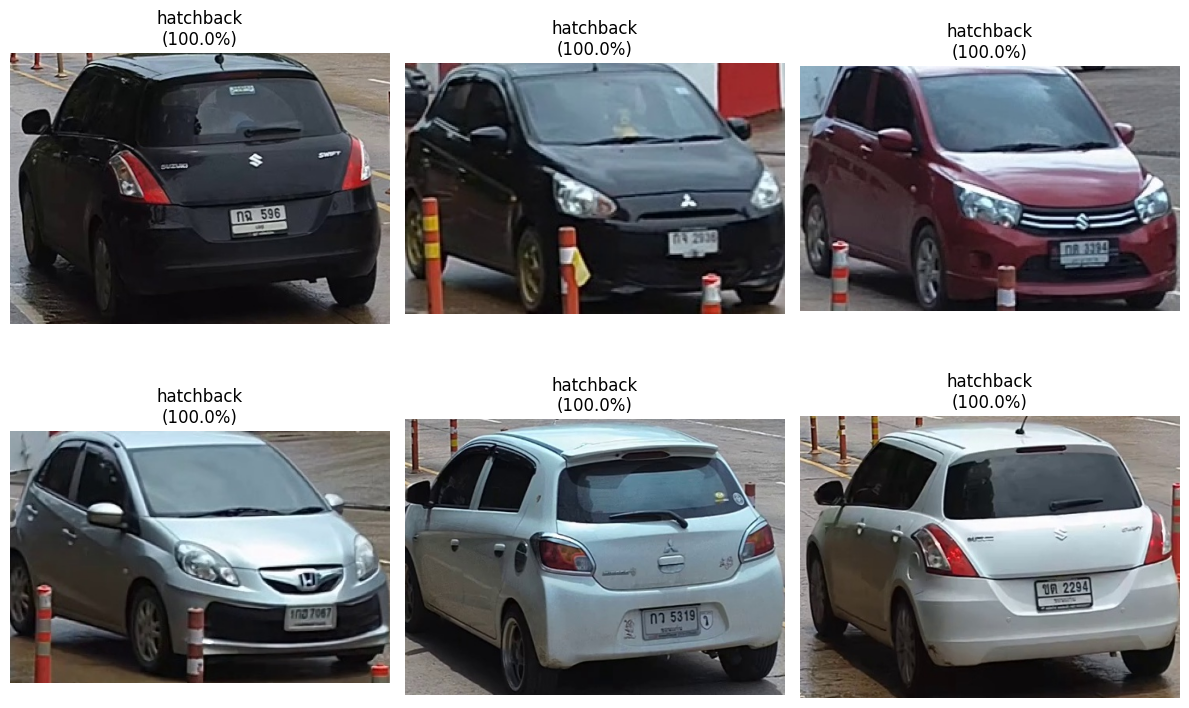

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random

# ✅ Load your clean retrained model
model = tf.keras.models.load_model("car_classification_model_clean.h5")

# ✅ Define class names (exactly your folders)
class_names = ['hatchback', 'sedan', 'suv']

# ✅ Folder path for test images (example: hatchback)
test_folder = r"E:\HOPE\AI CLASS\DEEP LEARNING\car classification\car_data_split\train\hatchback"

# ✅ Pick random 6 images from folder for testing
test_images = random.sample(
    [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))], 
    6
)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(test_images):
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Plot
    plt.subplot(2, 3, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"{predicted_class}\n({confidence:.1f}%)")

plt.tight_layout()
plt.show()


In [14]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os
from tensorflow.keras.preprocessing import image

# ✅ Load your clean model
model = tf.keras.models.load_model("car_classification_model_clean.h5")

# ✅ Class names (based on folders)
class_names = ['hatchback', 'sedan', 'suv']

# ✅ Validation folder path
val_dir = r"E:\HOPE\AI CLASS\DEEP LEARNING\car classification\car_data_split\val"

# ✅ Initialize lists
y_true = []
y_pred = []

# ✅ Loop through each class folder
for label, class_name in enumerate(class_names):
    class_folder = os.path.join(val_dir, class_name)
    
    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, file)

            # Load and preprocess
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            pred = model.predict(img_array, verbose=0)
            pred_label = np.argmax(pred)

            y_true.append(label)
            y_pred.append(pred_label)

# ✅ Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ✅ Classification report
print("\n📊 CLASSIFICATION REPORT\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# ✅ Confusion matrix
print("🔢 CONFUSION MATRIX\n")
print(confusion_matrix(y_true, y_pred))



📊 CLASSIFICATION REPORT

              precision    recall  f1-score   support

   hatchback       0.98      0.97      0.98       122
       sedan       0.98      0.99      0.99       246
         suv       1.00      1.00      1.00       136

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504

🔢 CONFUSION MATRIX

[[118   4   0]
 [  2 244   0]
 [  0   0 136]]
